In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')


In [ ]:
"./Desktop/Data_Files/titanic3.csv  "

In [3]:
%cd /Users/jimdoone/Desktop/Data_Files/

/Users/jimdoone/Desktop/Data_Files


In [4]:
%ls

AirPassengers.csv                 home_data.csv
AirPassengers.csv.csv             mac-keyboard-symbols.jpg
Data.csv                          people-example (2).csv
Philadelphia_Crime_Rate_noNA.csv  tips.csv
data/                             titanic3.csv*
data_2d.csv                       train.csv
excel.xlsx                        winequality-red.csv
flights.csv


In [9]:
dataset = pd.read_csv('titanic3.csv')
dataset.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [11]:
import seaborn as sns

In [12]:
dataset.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

- factorplot allows a column to be passed. Must verify the dataset
- Must employ 'kind' as kind = count

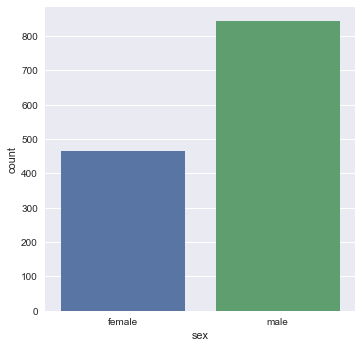

In [13]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.factorplot('sex', data=dataset, kind='count', size=5);

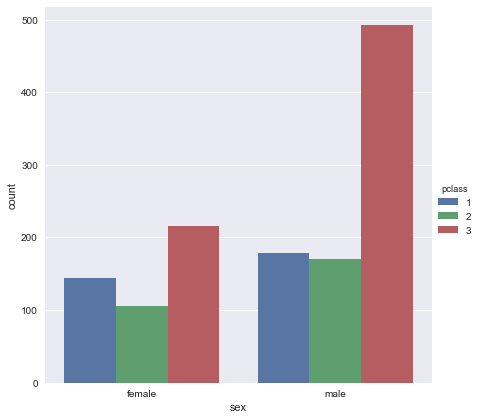

In [14]:

sns.factorplot('sex', data=dataset, kind='count', hue='pclass', size=6);

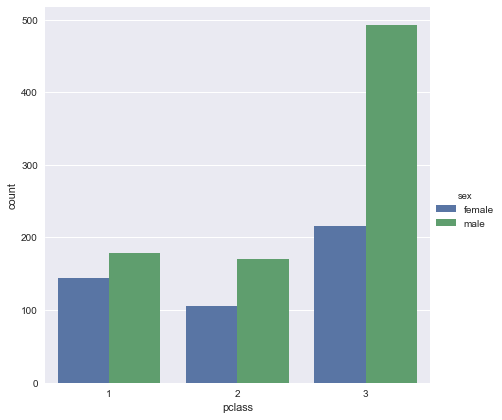

In [16]:

sns.factorplot('pclass', data=dataset, kind='count', hue='sex', size=6);

In [17]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    

In [18]:
dataset['person'] = dataset[['age', 'sex']].apply(male_female_child, axis=1)

In [19]:
dataset.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,person
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",female
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child


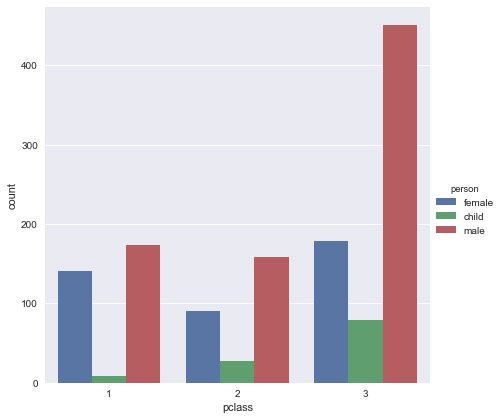

In [20]:
sns.factorplot('pclass',data=dataset, kind='count', hue='person', size=6);

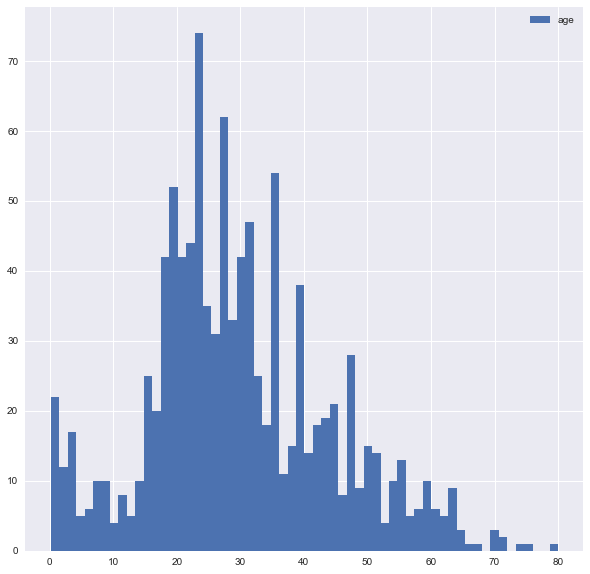

In [21]:
dataset['age'].hist(bins=60, label='age')
plt.xlabel='age'
plt.legend()
plt.show();

In [22]:
dataset.age.mean()

29.8811345124283

In [23]:
dataset['person'].value_counts()

male      784
female    410
child     115
Name: person, dtype: int64

### set some legend properties.  All the code below is optional.  The defaults are usually sensible but if you need more control, this shows you how:
- leg = plt.gca().get_legend()
- ltext  = leg.get_texts()  ## all the text.Text instance in the legend
- llines = leg.get_lines()  ## all the lines.Line2D instance in the legend
- frame  = leg.get_frame()  ## the patch.Rectangle instance surrounding the legend

### see text.Text, lines.Line2D, and patches.Rectangle for more info on the settable properties of lines, text, and rectangles
- frame.set_facecolor('0.80')      ## set the frame face color to light gray
- plt.setp(ltext, fontsize='small')    ## the legend text fontsize
- plt.setp(llines, linewidth=1.5)      ## the legend linewidth
#leg.draw_frame(False)           ## don't draw the legend frame

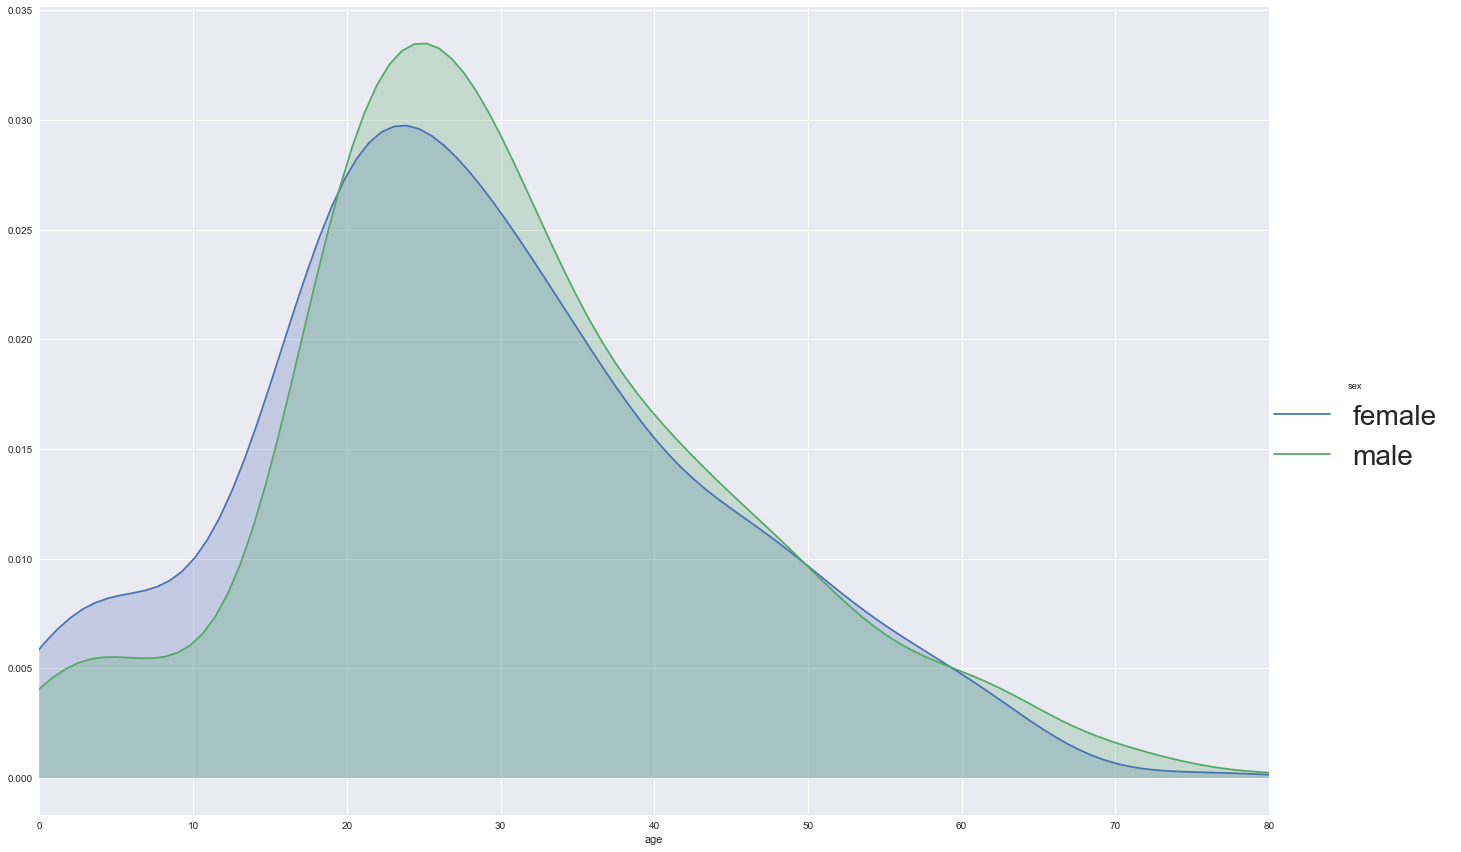

In [44]:
fig = sns.FacetGrid(dataset, hue='sex', size= 12, aspect=1.5)

fig.map(sns.kdeplot, 'age', shade=True)

oldest = dataset['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend(prop={'size':28})
fig.set_titles();

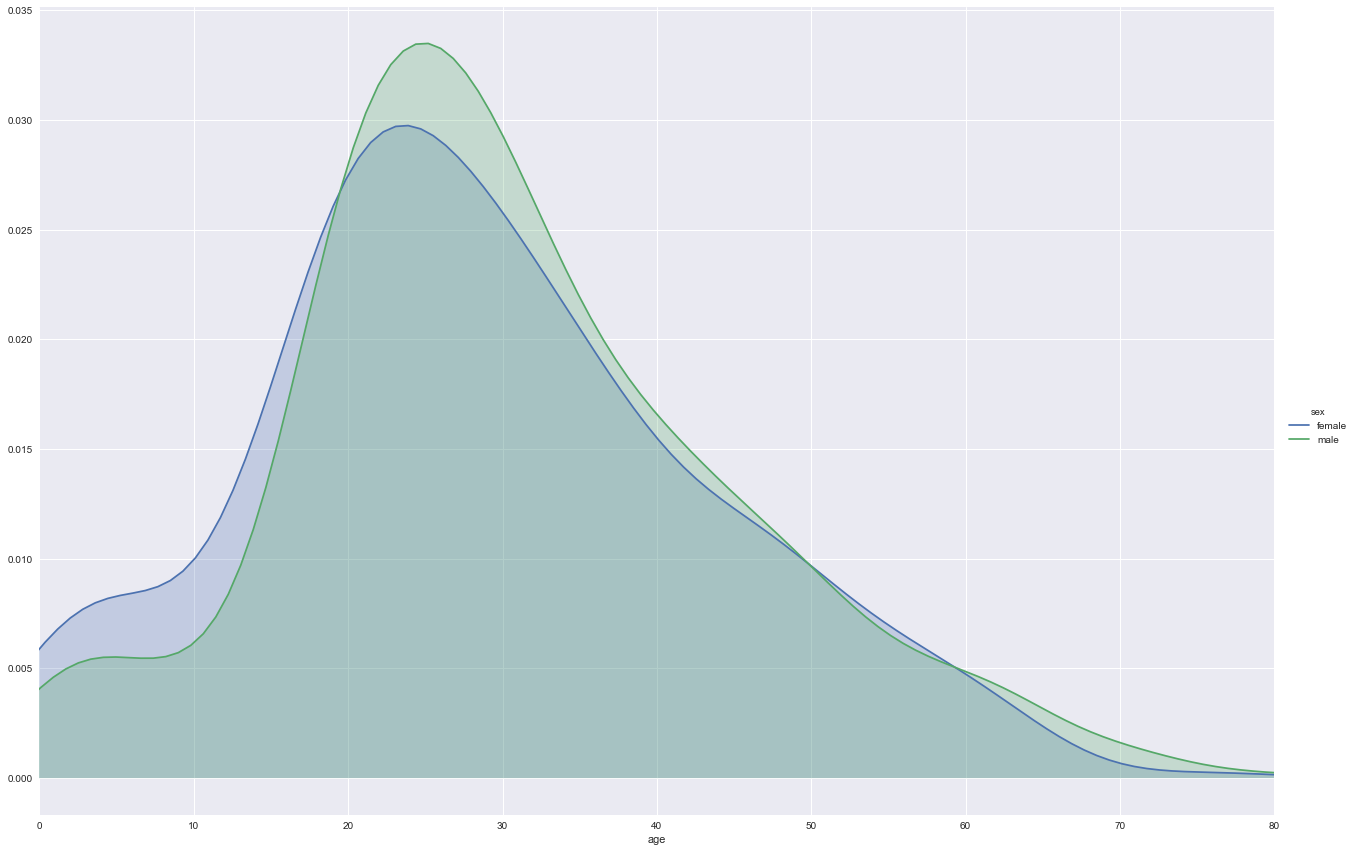

In [31]:
fig = sns.FacetGrid(dataset, hue='sex', size= 12, aspect=1.5)

fig.map(sns.kdeplot, 'age', shade=True)

oldest = dataset['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend();



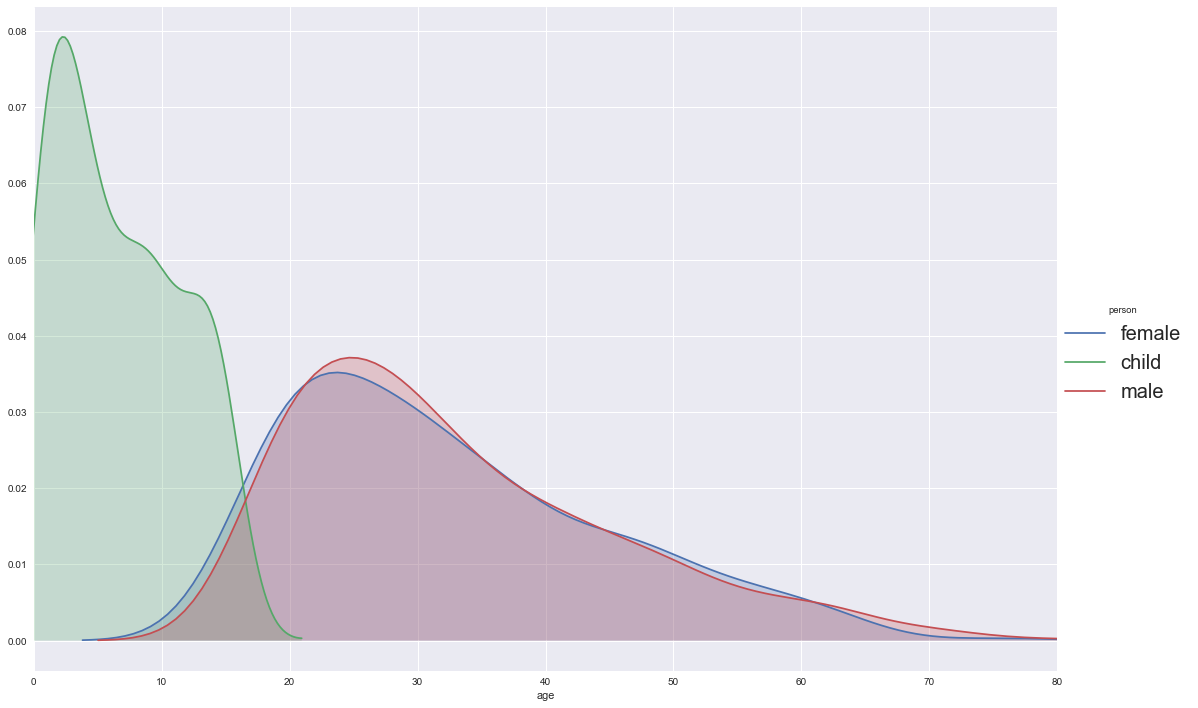

In [137]:

fig = sns.FacetGrid(dataset, hue='person', size = 10, aspect=1.5)

fig.map(sns.kdeplot, 'age', shade=True)

oldest = dataset['age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend();



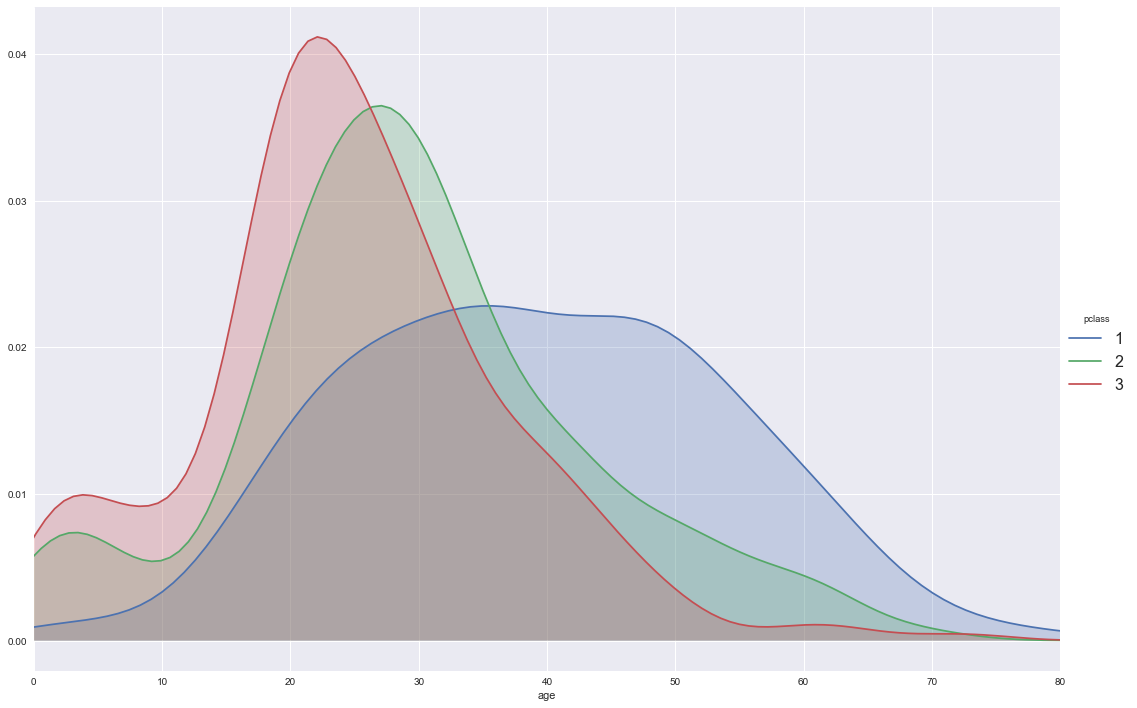

In [46]:
fig = sns.FacetGrid(dataset, hue='pclass', size=10, aspect=1.5, legend_out=True)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = dataset['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend(prop={'size':16});

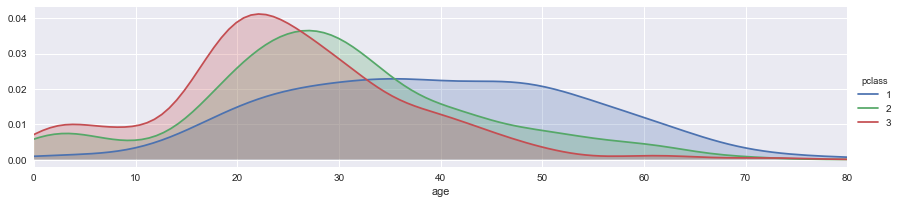

In [49]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(dataset, hue="pclass",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = dataset['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend();

In [55]:
deck = dataset.cabin.dropna()
deck.head(10)

0          B5
1     C22 C26
2     C22 C26
3     C22 C26
4     C22 C26
5         E12
6          D7
7         A36
8        C101
10    C62 C64
Name: cabin, dtype: object

In [58]:
cabin_lst = []

In [59]:
for letter in deck:
    cabin_lst.append(letter[0])

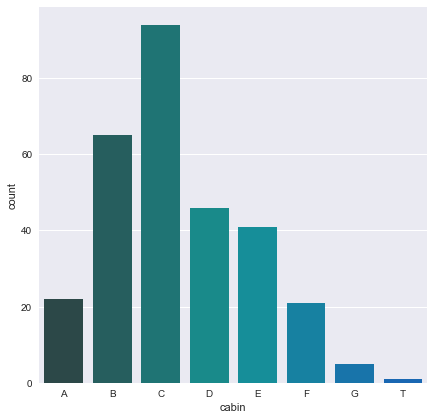

In [68]:
cabin_df = pd.DataFrame(cabin_lst)
cabin_df.columns = ["cabin"]
sns.factorplot('cabin', data=cabin_df, kind='count', size= 6, legend=True, palette='winter_d', 
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']);

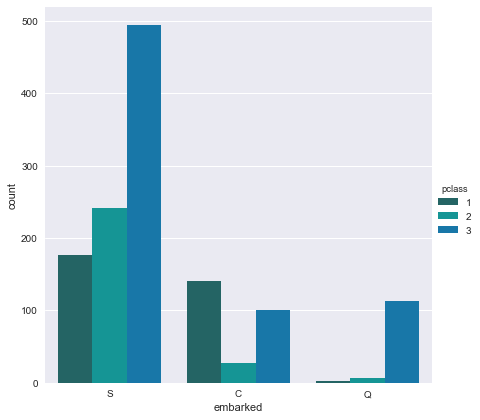

In [72]:
sns.factorplot('embarked', data= dataset, size=6, palette='winter_d', hue ='pclass', kind='count');

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
person       1309 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [74]:
dataset.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,person
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",female
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child


In [78]:
#df.query('(x1 > x0) & (x3 > x2)’)
dataset.query('(sibsp==0) & (parch==0)').head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,person
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",female
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",male
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",male
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",male
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",female


In [79]:
dataset['alone'] = dataset['sibsp'] + dataset['parch']
dataset.alone.head()

0    0
1    3
2    3
3    3
4    3
Name: alone, dtype: int64

In [82]:
dataset['alone'].loc[dataset.alone>0] = 'not_alone'
dataset['alone'].loc[dataset.alone==0] = 'alone'

/Users/jimdoone/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [83]:
dataset.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,person,alone
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",female,alone
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child,not_alone


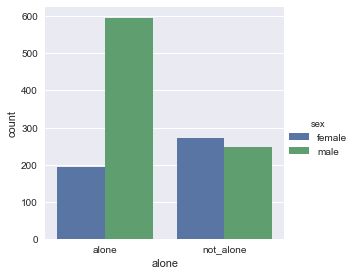

In [84]:
sns.factorplot('alone', data=dataset, kind='count', hue='sex')

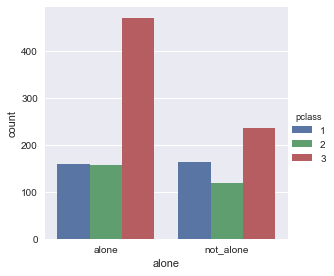

In [86]:
sns.factorplot('alone', data=dataset, kind='count', hue='pclass');

In [87]:
dataset.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'person',
       'alone'],
      dtype='object')

In [88]:
dataset['survivor'] = dataset['survived'].map({0:'no', 1:'yes'})

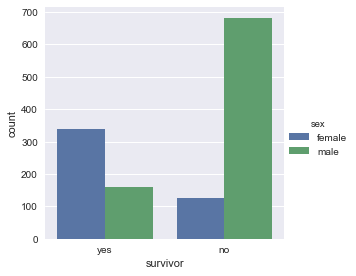

In [89]:
sns.factorplot('survivor', data=dataset, hue='sex', kind='count')

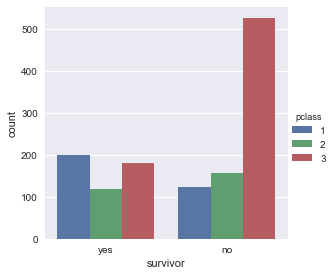

In [90]:
sns.factorplot('survivor', data=dataset, kind='count', hue='pclass')

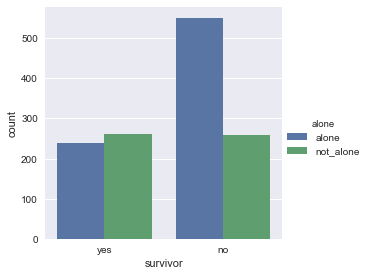

In [91]:
sns.factorplot('survivor', data=dataset, kind='count', hue='alone')

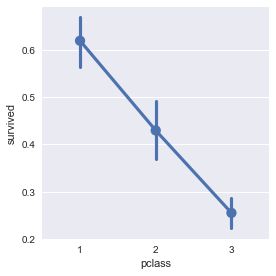

In [101]:
sns.factorplot('pclass', 'survived', data=dataset);

In [97]:
dataset['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

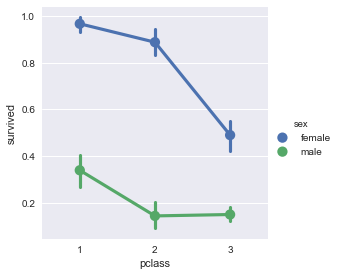

In [102]:
sns.factorplot('pclass', 'survived', data=dataset, hue='sex')

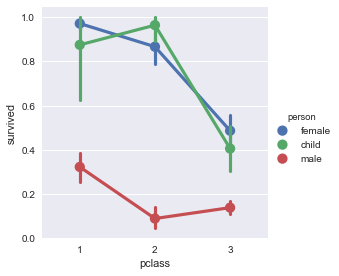

In [103]:
sns.factorplot('pclass', 'survived', data=dataset, hue='person')

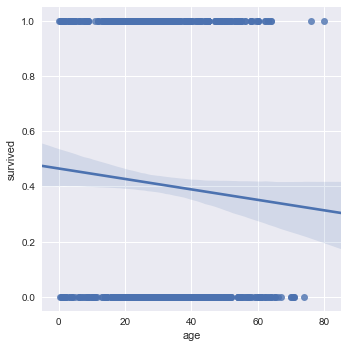

In [104]:
sns.lmplot('age', 'survived', data=dataset)

In [ ]:
.. plot::
    :context: close-figs

    >>> titanic = sns.load_dataset("titanic")
    >>> g = sns.factorplot("alive", col="deck", col_wrap=4,
    ...                    data=titanic[titanic.deck.notnull()],
    ...                    kind="count", size=2.5, aspect=.8)

Plot horizontally and pass other keyword arguments to the plot function:

.. plot::
    :context: close-figs

    >>> g = sns.factorplot(x="age", y="embark_town",
    ...                    hue="sex", row="class",
    ...                    data=titanic[titanic.embark_town.notnull()],
    ...                    orient="h", size=2, aspect=3.5, palette="Set3",
    ...                    kind="violin", split=True, cut=0, bw=.2)

Use methods on the returned :class:`FacetGrid` to tweak the presentation:

.. plot::
    :context: close-figs

    >>> g = sns.factorplot(x="who", y="survived", col="class",
    ...                    data=titanic, saturation=.5,
    ...                    kind="bar", ci=None, aspect=.6)
    >>> (g.set_axis_labels("", "Survival Rate")
    ...   .set_xticklabels(["Men", "Women", "Children"])
    ...   .set_titles("{col_name} {col_var}")
    ...   .set(ylim=(0, 1))
    ...   .despine(left=True))  #doctest: +ELLIPSIS